## Mix anaylsis


In [14]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import hdbscan
import umap


In [15]:
twoprimeo_pos = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958, 27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

twoprimeo_pos_25 = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958]

twoprimeo_pos_18 = [27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

In [16]:
pseduo_u_pos = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974, 105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_18 = [105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_25 = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974]


In [38]:
ivt_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/canonical_ivt.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/run_cbf5_glu.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/run_nop_glu.csv"       
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/native_cbf5_gal.csv"

# cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_cbf5_glu_round30_alt_canonical_supervised_500_500.model.csv"
# nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_nop58_glu_round30_alt_canonical_supervised_500_500.model.csv"       


all_file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, native_cbf5_gal_path]
all_labels = ["ivt", "cbf5_glu_psu_depletion", "nop58_glu_2o_depletion", "cbf5_gal"]



# # YWD448a: loss psu @ 18-759; 25-775(776)
# YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant448_YPD.csv"
# # YWD451a: loss psu @ 18-1289
# YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant451_YPD.csv"
# # YWD452a: loss of 2'Ome @ 18-436
# YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant452_YPD.csv"
# # WT_CY: cycloheximide
# WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_CY.csv"
# # WT_CY: Potassium Acetate
# WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_KOAC.csv"
# # actual wildtype
# WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_YPD.csv"

# ROUND 2 experiments
# stationary phase
WT_stationary = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_stationary.csv"
# deletion of Dbp3d (a DEAD box protein important for processing 2'Ome snoRNAs U18 and U24)
Dbp3d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/Dbp3d_YPD.csv"
# PB (an RNA splicing inhibitor)
WT_PB = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_PB.csv"
# rapamycin treatment for 5 hours (activates the TOR kinase pathway that regulates cell growth and ribosome biogenesis)
WT_rapa5 = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_rapa5.csv"
# deletion of Trl1 (Manny showed this is important for making intron circles, which seem to me enriched for introns that encode snoRNAs)
trl1d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/trl1d_YPD.csv"

YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant448_YPD.csv"
# YWD451a: loss psu @ 18-1289
YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant451_YPD.csv"
# YWD452a: loss of 2'Ome @ 18-436
YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant452_YPD.csv"
# WT_CY: cycloheximide
WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_CY.csv"
# WT_CY: Potassium Acetate
WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_KOAC.csv"
# actual wildtype
WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_YPD.csv"
mix = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/Mix.csv"


file_paths = [YWD448a, YWD451a, YWD452a, WT_CY, WT_KOAC, WT_YPD]
labels = ["YWD448a", "YWD451a", "YWD452a", "WT_CY", "WT_KOAC", "WT_YPD"]
all_file_paths.extend(file_paths)
all_labels.extend(labels)

In [18]:
all_file_paths = [WT_YPD, mix]
all_labels = ["WT_YPD", "mix"]
all_file_paths = [mix]
all_labels = ["mix"]

In [19]:

vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


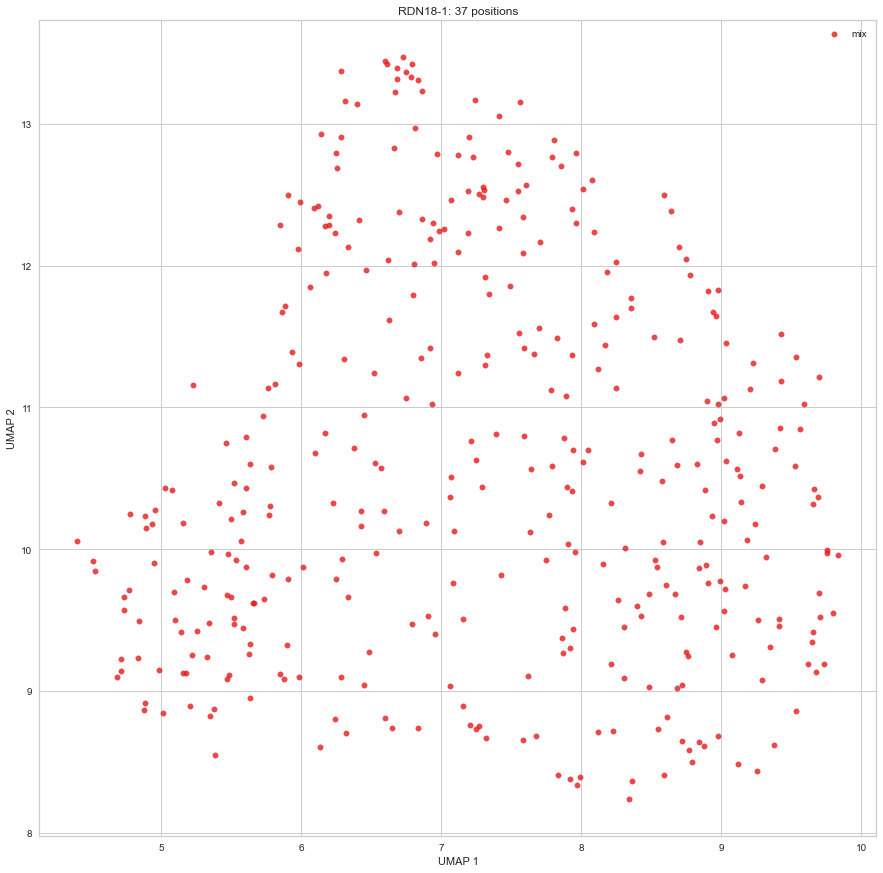

In [7]:
contig = 'RDN18-1'
n_components = 2
n = -1
save_fig_path = None
other_params = {"alpha": 0.8, "s":30}
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure3/{contig}_umap_dbp3.png"
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, n=n, **other_params)   

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


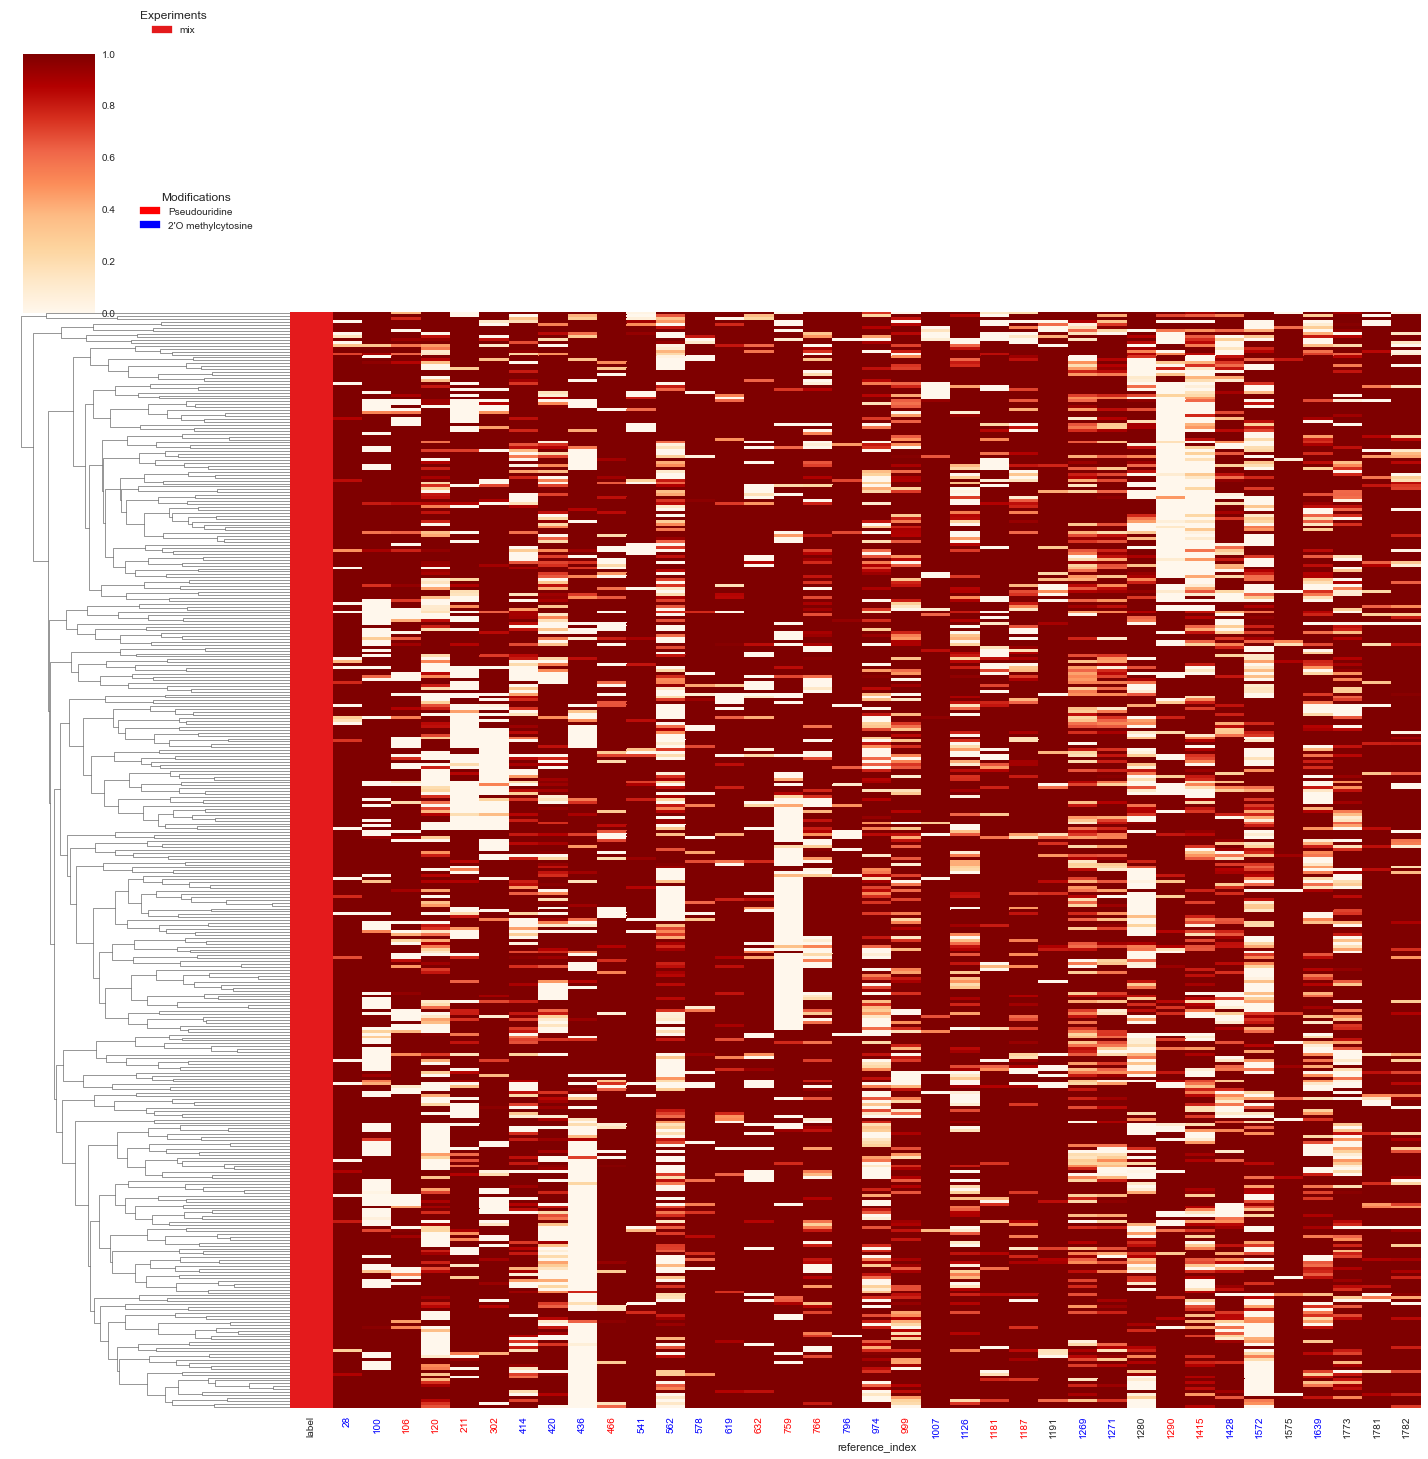

In [20]:
n = -1
figure_path = None
metric = 'euclidean'
metric = 'correlation'

method = 'average'
contig = 'RDN18-1'
save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_hier_mix.png"

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                           metric=metric,
                           method=method, 
                           col_cluster=False,
                           row_cluster=True,
                           twoprimeo_pos=twoprimeo_pos,
                           pseduo_u_pos=pseduo_u_pos)


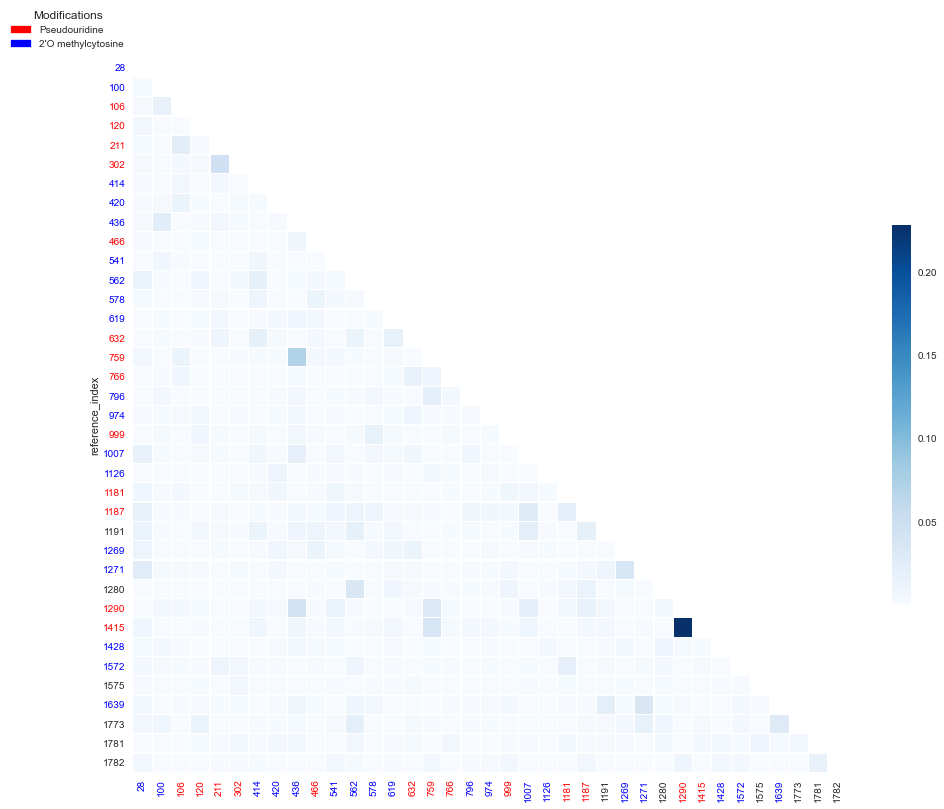

,27r2,99r2,105r2,119r2,210r2,301r2,413r2,419r2,435r2,465r2,...,1279r2,1289r2,1414r2,1427r2,1571r2,1574r2,1638r2,1772r2,1780r2,1781r2
reference_index,,,,,,,,,,,,,,,,,,,,,
27,1.000000,2.267574e-03,3.401361e-03,6.828436e-03,4.369538e-03,0.003550,1.572701e-03,0.001506,3.108960e-03,0.001256,...,1.057849e-04,0.000002,0.008668,0.004035,0.005326,1.756440e-03,0.007776,0.007441,0.000589,5.561684e-03
99,0.002268,1.000000e+00,1.764718e-02,9.677488e-07,2.644952e-04,0.000129,8.591883e-04,0.003325,2.511282e-02,0.000157,...,4.643982e-04,0.006504,0.000062,0.004637,0.003386,4.071857e-04,0.000143,0.008606,0.000451,2.042859e-05
105,0.003401,1.764718e-02,1.000000e+00,7.025856e-04,2.437801e-02,0.005844,7.374947e-03,0.013960,7.926700e-04,0.000553,...,1.165793e-04,0.006204,0.000265,0.000908,0.002408,7.083586e-04,0.001547,0.000064,0.000221,4.170838e-05
119,0.006828,9.677488e-07,7.025856e-04,1.000000e+00,1.309569e-03,0.003511,4.598167e-04,0.002143,1.167070e-03,0.002131,...,2.415288e-04,0.002376,0.001302,0.000010,0.001407,2.322871e-03,0.003121,0.016042,0.002563,7.535886e-04
210,0.004370,2.644952e-04,2.437801e-02,1.309569e-03,1.000000e+00,0.047653,5.883776e-03,0.000408,7.586407e-03,0.000036,...,1.183312e-04,0.000478,0.000759,0.000729,0.011956,2.464474e-04,0.002046,0.000770,0.001739,1.531851e-03
301,0.003550,1.287871e-04,5.843717e-03,3.511204e-03,4.765341e-02,1.000000,5.977720e-04,0.004116,2.212094e-03,0.000371,...,6.008069e-06,0.000729,0.000286,0.000774,0.007473,7.207462e-03,0.002236,0.000217,0.006670,9.424087e-04
413,0.001573,8.591883e-04,7.374947e-03,4.598167e-04,5.883776e-03,0.000598,1.000000e+00,0.002407,5.284257e-04,0.000058,...,4.541313e-07,0.006868,0.008334,0.000005,0.001141,1.819522e-06,0.000222,0.001689,0.001066,1.996148e-03
419,0.001506,3.325468e-03,1.395991e-02,2.143164e-03,4.080250e-04,0.004116,2.406827e-03,1.000000,1.636539e-03,0.000052,...,3.444133e-04,0.003294,0.000323,0.003549,0.001458,6.083645e-04,0.001056,0.002484,0.006752,4.355946e-04
435,0.003109,2.511282e-02,7.926700e-04,1.167070e-03,7.586407e-03,0.002212,5.284257e-04,0.001637,1.000000e+00,0.009719,...,4.387839e-04,0.042023,0.009639,0.007736,0.000005,4.151563e-04,0.009160,0.002528,0.007116,7.758628e-08


In [9]:
contig = 'RDN18-1'
save_fig_path = None
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure3/{contig}_corr_dbp3.png"
cmap = "hot"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
s = "r2"
# s = "D'"
# s = "D"

vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), stat=s, linewidths=0.1, cmap=cmap, norm=norm, figure_path=save_fig_path, pseduo_u_pos=pseduo_u_pos, twoprimeo_pos=twoprimeo_pos)       



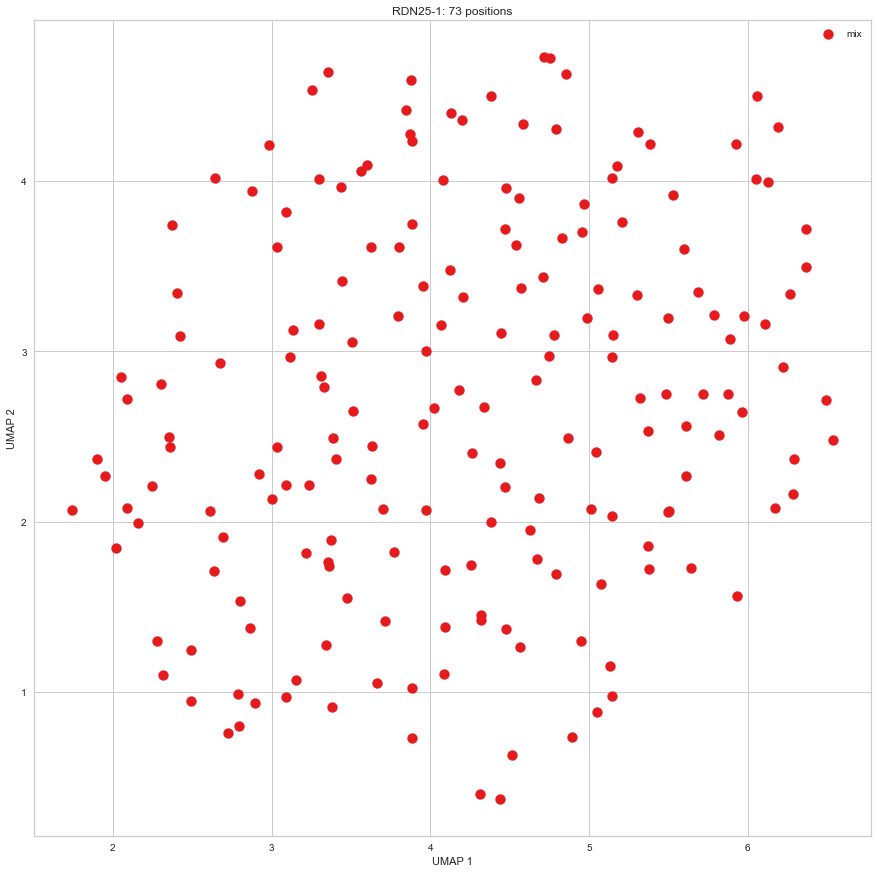

In [10]:
contig = 'RDN25-1'
n_components = 2
n = -1
save_fig_path = None
other_params = {"alpha": 1, "s":100}
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure3/{contig}_umap_dbp3.svg"
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, n=n, **other_params)   

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


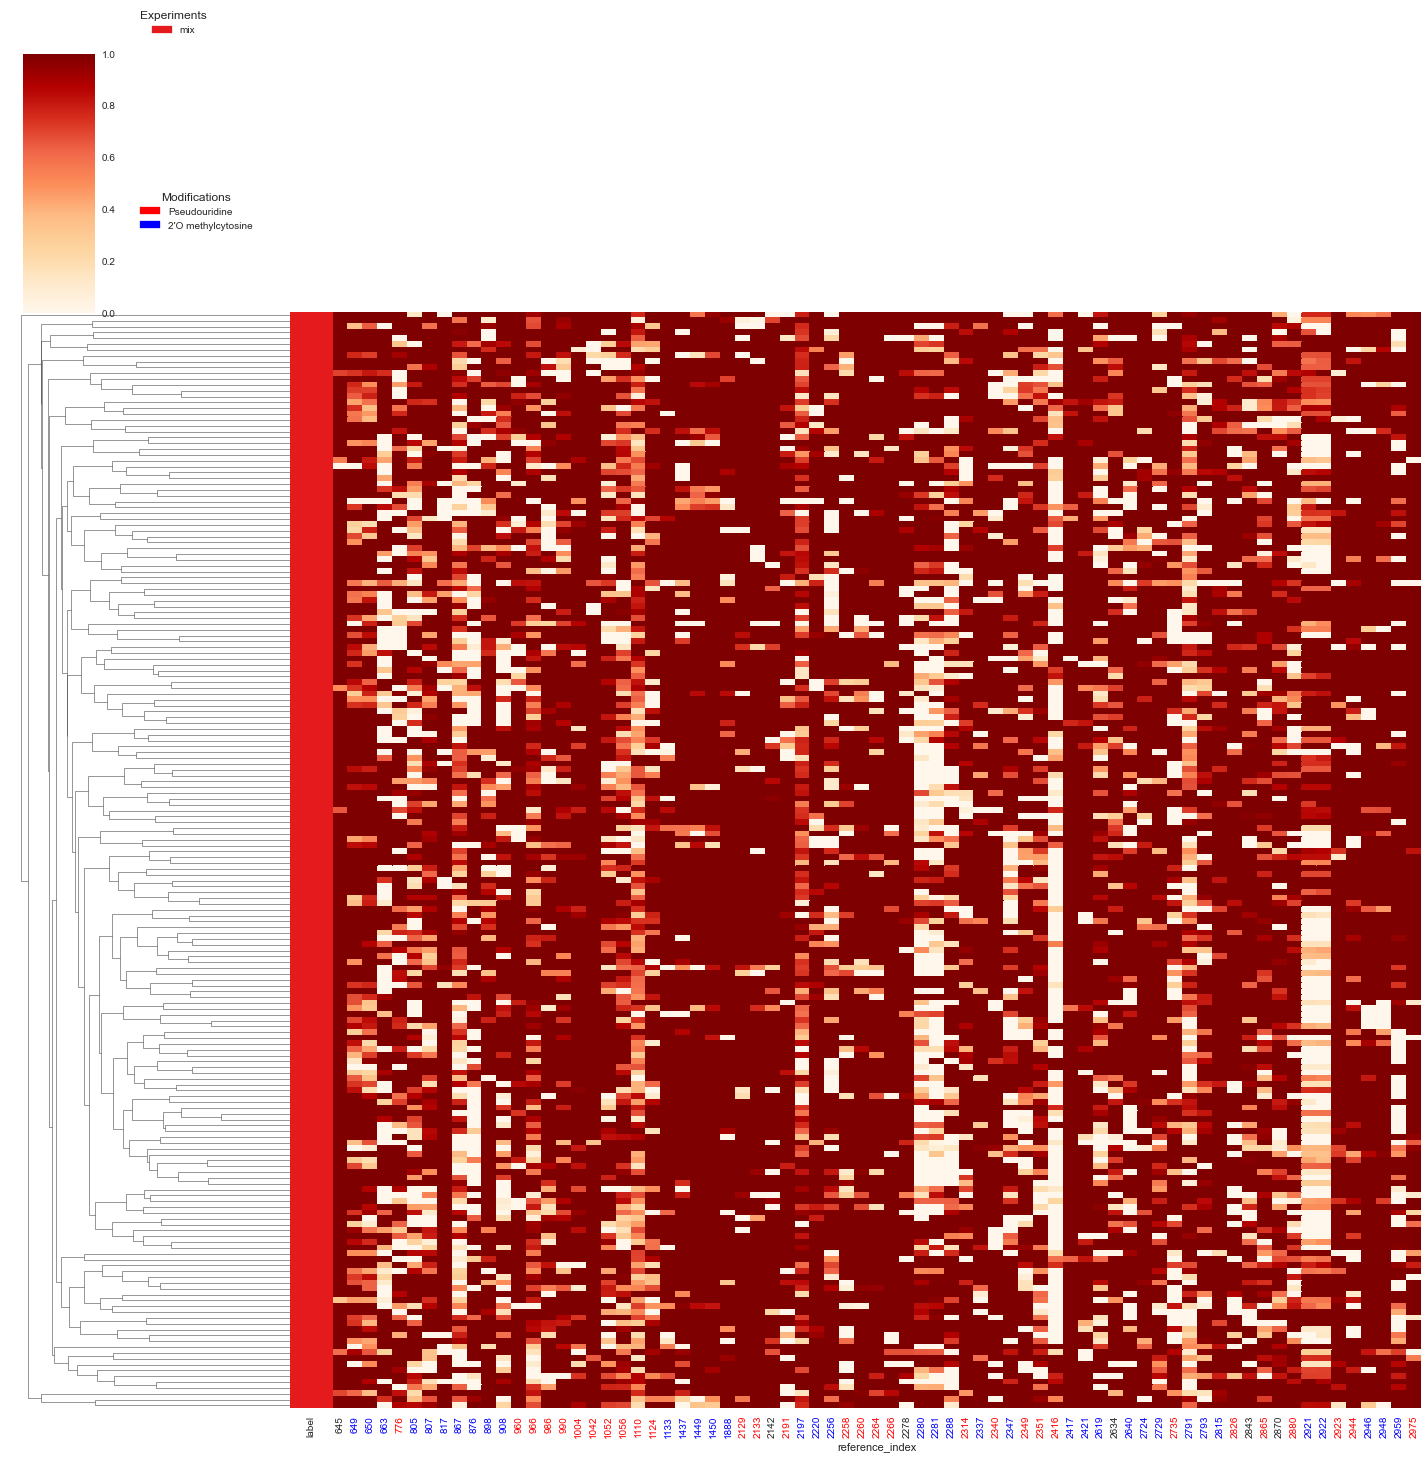

In [21]:
n = -1
save_fig_path = None
metric = 'cityblock'
metric = "euclidian"
metric = "correlation"
method = 'average'
contig = 'RDN25-1'
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure3/{contig}_hier_dbp3.png"
save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_hier_mix.png"

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                           metric=metric,
                           method=method, 
                           col_cluster=False,
                           row_cluster=True,
                           twoprimeo_pos=twoprimeo_pos,
                           pseduo_u_pos=pseduo_u_pos)


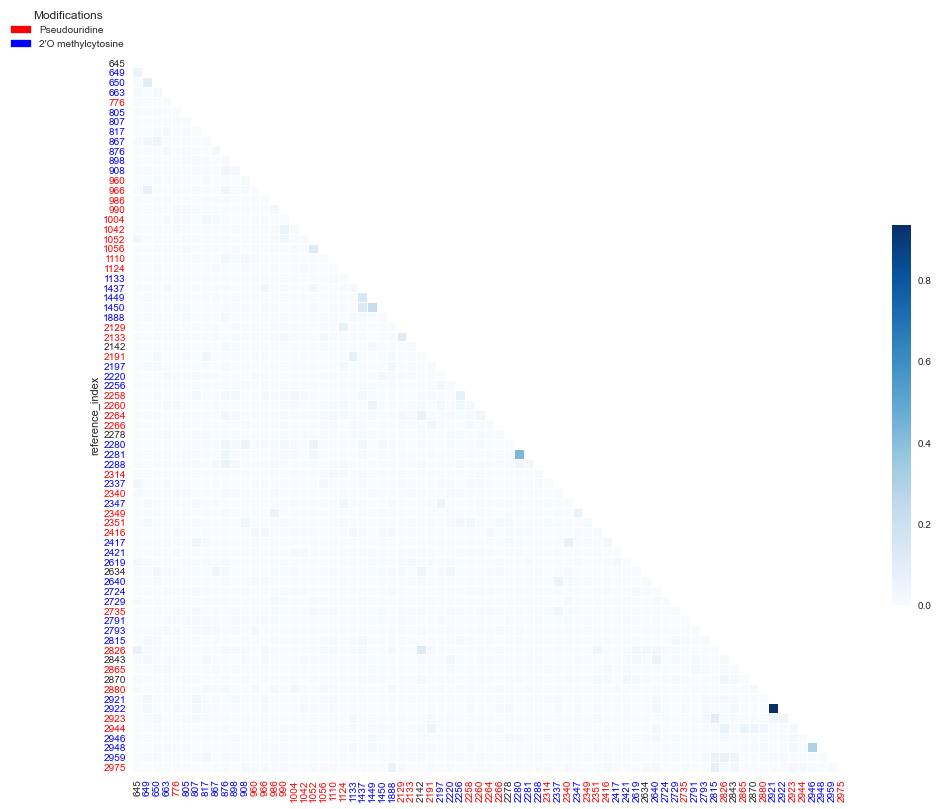

In [12]:
contig = 'RDN25-1'
save_fig_path = None
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure3/{contig}_corr_dbp3.png"
cmap = "hot"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
s = "r2"
# s = "D"
# s = "D'"

a = vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), stat=s, linewidths=0.1, cmap=cmap, norm=norm, figure_path=save_fig_path, pseduo_u_pos=pseduo_u_pos, twoprimeo_pos=twoprimeo_pos)       


In [99]:
a.loc[644,"644r2"]

0.9999999999999937

In [14]:
indices = np.where(a > 0.1)
# print(a[indices]) # prints [400 400] because two indices for max
#Now lets print the location (Index)
for i, j in zip(*indices):
    if i == j:
        continue
#     if np.abs(a.index[i]- a.index[j]) < 4:
#         continue
    print(a.index[i], a.index[j], a.loc[a.index[i], str(a.index[j])+"r2"])
    

648 649 0.4200630621821443
649 648 0.4200630621821443
816 907 0.20511320302577177
907 816 0.20511320302577177
1436 1448 0.5922009273042683
1436 1449 0.6169671493003335
1448 1436 0.5922009273042684
1448 1449 0.6541219493347827
1449 1436 0.6169671493003336
1449 1448 0.6541219493347827
2279 2280 0.4198702274596796
2280 2279 0.41987022745967956
2346 2348 0.11400392482663603
2348 2346 0.11400392482663603
2618 2723 0.20792467597326642
2723 2618 0.20792467597326642
2920 2921 0.9490603810320191
2921 2920 0.9490603810320191
2945 2947 0.312288456080751
2947 2945 0.31228845608075095


# Top % change in mod

In [39]:
all_file_paths = [WT_YPD, mix]
all_labels = ["wt", "mix"]
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")

contig = 'RDN25-1'
X = vc.get_X(contig, vc.get_contig_positions(contig))
mix_df = X[X.index.get_level_values("label") == "mix"]
wt = X[X.index.get_level_values("label") == "wt"]
df_25 = pd.DataFrame([wt.mean(), mix_df.mean(), wt.mean() - mix_df.mean()]).T.rename(columns={0:"wt_np", 1:"dbp3_np", 2:"diff_np"})
df_25["contig"] = "25S"
contig = 'RDN18-1'
X = vc.get_X(contig, vc.get_contig_positions(contig))
mix_df = X[X.index.get_level_values("label") == "mix"]
wt = X[X.index.get_level_values("label") == "wt"]
df_18 = pd.DataFrame([wt.mean(), mix_df.mean(), wt.mean() - mix_df.mean()]).T.rename(columns={0:"wt_np", 1:"dbp3_np", 2:"diff_np"})
df_18["contig"] = "18S"
df_np = pd.concat([df_18, df_25])
df_np["pos"] = df_np.index +1 
result = df_np

In [40]:
result

,wt_np,dbp3_np,diff_np,contig,pos
reference_index,,,,,
27,0.934191,0.933433,0.000759,18S,28
99,0.754002,0.716489,0.037513,18S,100
105,0.854102,0.833805,0.020297,18S,106
119,0.693672,0.627233,0.066439,18S,120
210,0.692672,0.707188,-0.014516,18S,211
...,...,...,...,...,...
2943,0.880228,0.871005,0.009223,25S,2944
2945,0.942093,0.925838,0.016255,25S,2946
2947,0.962345,0.933741,0.028604,25S,2948


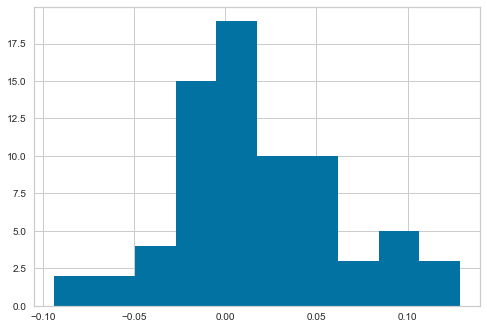

In [46]:
result[result["contig"] == "25S"]["diff_np"].hist()

In [45]:
result[result["contig"] == "25S"].sort_values("diff_np", ascending=False)

,wt_np,dbp3_np,diff_np,contig,pos
reference_index,,,,,
1051,0.875680,0.746961,0.128719,25S,1052
775,0.830535,0.718881,0.111654,25S,776
2279,0.619246,0.510836,0.108410,25S,2280
2958,0.821766,0.728053,0.093713,25S,2959
2257,0.936628,0.845420,0.091208,25S,2258
...,...,...,...,...,...
2842,0.783607,0.830594,-0.046988,25S,2843
2922,0.890594,0.945303,-0.054709,25S,2923
2190,0.812126,0.874226,-0.062100,25S,2191
